In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

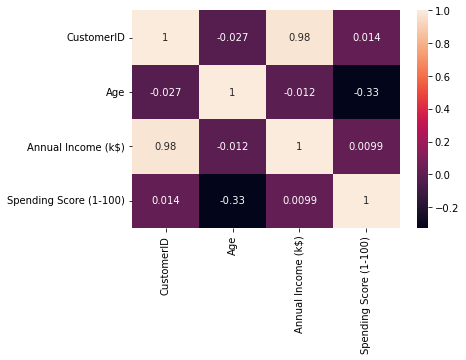

In [5]:
sns.heatmap(df.corr() , annot=True)

In [6]:
df.drop('CustomerID', axis='columns', inplace=True)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<AxesSubplot:>

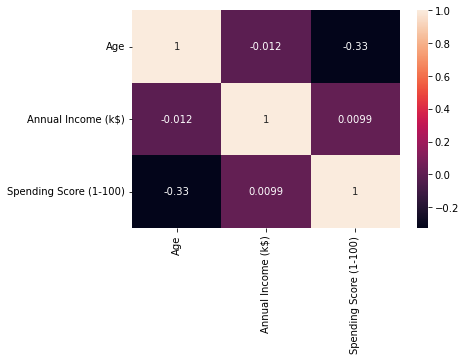

In [8]:
sns.heatmap(df.corr() , annot=True)

In [9]:
df.rename(columns={'Spending Score (1-100)' : 'score' , 'Annual Income (k$)':'income'}, inplace=True)

In [10]:
df

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [11]:
#df.to_csv('new.csv')

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Gender =le.fit_transform(df.Gender) 
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


# Visualization

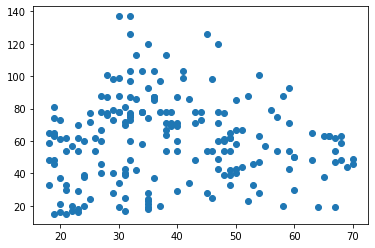

In [13]:
plt.scatter(df['Age'],df['income'])

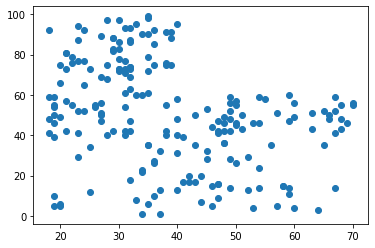

In [14]:
plt.scatter(df['Age'],df['score'])


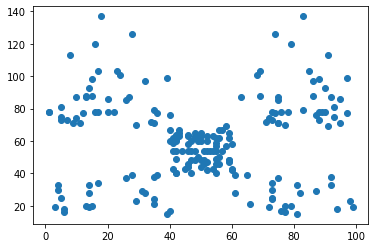

In [15]:
plt.scatter(df['score'],df['income'])

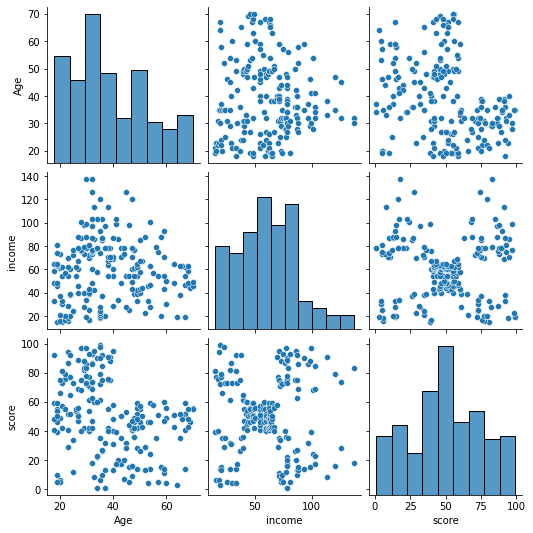

In [16]:
#pairplot
sns.pairplot(df[['Age','income','score']])

In [17]:
import sklearn.cluster as cluster

In [18]:
kmeans = cluster.KMeans()

In [19]:
kmeans.fit(df[['Gender','Age','income', 'score']])

KMeans()

In [20]:
kmeans.cluster_centers_

array([[  0.38888889,  27.16666667,  58.47222222,  48.80555556],
       [  0.46428571,  32.78571429,  78.03571429,  81.89285714],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.55882353,  41.64705882,  88.73529412,  16.76470588],
       [  0.39130435,  25.52173913,  26.30434783,  78.56521739],
       [  0.41666667,  48.75      ,  24.58333333,   9.58333333],
       [  0.45454545,  32.45454545, 108.18181818,  82.72727273],
       [  0.33333333,  37.5       ,  29.33333333,  34.58333333]])

In [21]:
df['clusters'] = kmeans.predict(df[['Gender','Age','income', 'score']])

In [22]:
df

,Gender,Age,income,score,clusters
0,1,19,15,39,7
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,7
...,...,...,...,...,...
195,0,35,120,79,6
196,0,45,126,28,3
197,1,32,126,74,6
198,1,32,137,18,3


In [23]:
df2 = df.copy()

In [25]:
#kmeans.fit_predict(df[['income', 'score']])

# Smart Visualization

In [26]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
df3 = df[df.clusters == 3]
df4 = df[df.clusters == 4]
df5 = df[df.clusters == 5]
df6 = df[df.clusters == 6]
df7 = df[df.clusters == 7]

In [27]:
df.shape

(200, 5)

In [28]:
df0.shape

(36, 5)

In [29]:
df7.shape

(12, 5)

In [30]:
centers1 = kmeans.cluster_centers_

In [32]:
centers1

array([[ 63.95238095,  46.21428571],
       [ 80.18181818,  12.68181818],
       [109.7       ,  82.        ],
       [ 25.0952381 ,  80.04761905],
       [ 47.44444444,  51.24444444],
       [ 25.14285714,  19.52380952],
       [109.7       ,  22.        ],
       [ 78.55172414,  82.17241379]])

In [33]:
#plt.scatter(df['income'],df['score'])

# Select Optimal Number Of Clusters

In [35]:
from sklearn.cluster import KMeans
wcss = []
cluster = range(1,15)
for k in cluster:
    kmeans2 = KMeans(n_clusters=k) # default = 8
    kmeans2.fit(df[['Gender','Age','income', 'score']])
    wcss.append(kmeans2.inertia_) 
    
'''
Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between 
each data point and its centroid, squaring this distance, and summing these squares across one cluster. 
A good model is one with low inertia AND a low number of clusters ( K ).
'''

E:\Angonda\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


'\nInertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between \neach data point and its centroid, squaring this distance, and summing these squares across one cluster. \nA good model is one with low inertia AND a low number of clusters ( K ).\n'

In [36]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75399.61541401486,
 58348.64136331505,
 51165.18423710792,
 44389.80767355767,
 40639.66039466073,
 37402.42600066601,
 34388.55375239852,
 32025.576838950536,
 29623.107086622513,
 28248.20707070706]

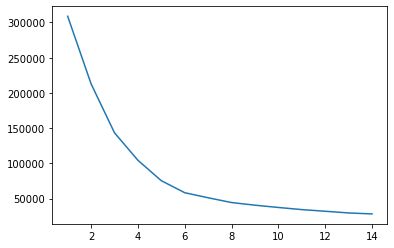

In [37]:
plt.plot(cluster, wcss,)

In [38]:
!pip install kneed

In [39]:
from kneed import KneeLocator

In [40]:
kn = KneeLocator(cluster, wcss, curve='convex', direction = 'decreasing')

In [41]:
kn.knee

5

In [42]:
print('Optimal number of clusters =', kn.knee)

Optimal number of clusters = 5


# After Tuning

In [43]:
df.head()

,Gender,Age,income,score,clusters
0,1,19,15,39,7
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,7


In [44]:
import sklearn.cluster as cls

In [45]:
kmean3 = cls.KMeans(n_clusters=5)

In [46]:
df['new_cluster'] = kmean3.fit_predict(df[['Gender','Age','income', 'score']])

In [47]:
df.head()

,Gender,Age,income,score,clusters,new_cluster
0,1,19,15,39,7,4
1,1,21,15,81,4,2
2,0,20,16,6,5,4
3,0,23,16,77,4,2
4,0,31,17,40,7,4


In [48]:
centers2 = kmean3.cluster_centers_

In [49]:
centers2

array([[ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348]])